In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
torch.manual_seed(42)

In [ ]:
#Check for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device:{device}")

using device:cuda


In [ ]:
df=pd.read_csv('/content/fashion-mnist_test.csv (1).zip')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


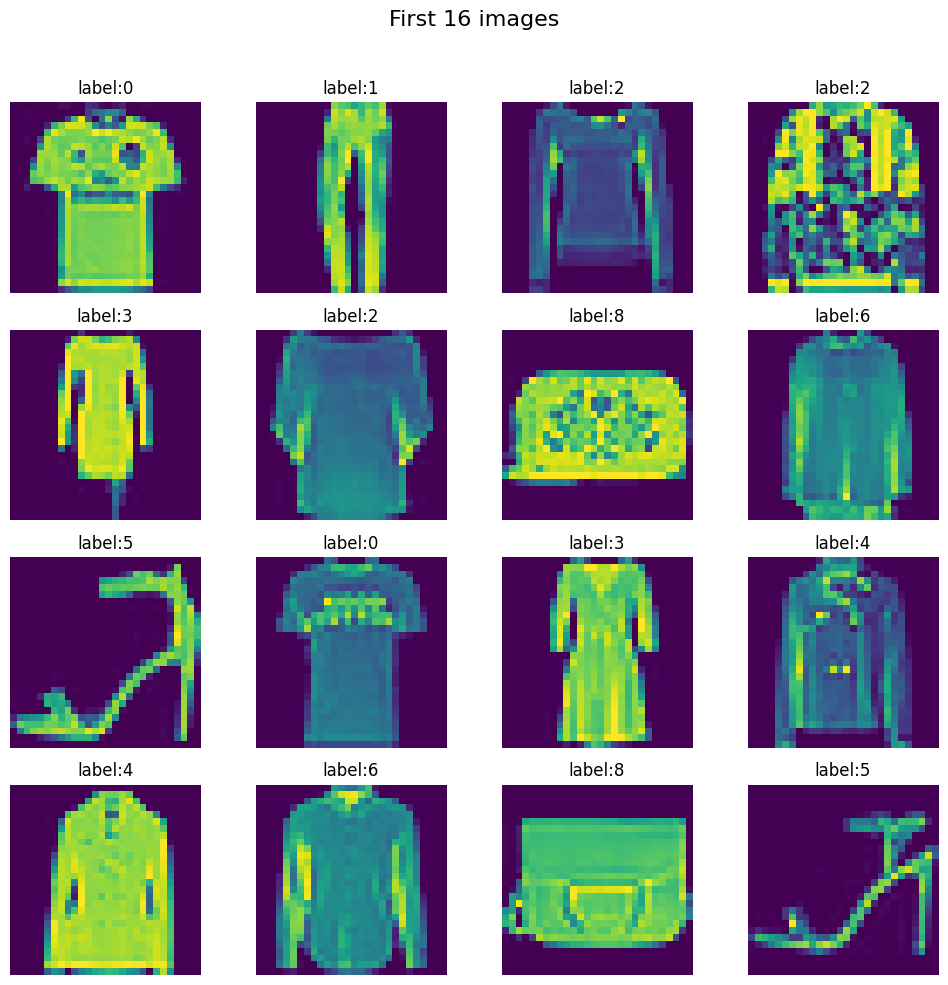

In [ ]:
#create 4*4 grid of image
fig ,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)
#Plot the first 16 images from dataset
for i ,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28) #reshape to 28*28
  ax.imshow(img)   #Display in grayscale
  ax.axis('off')   #Remove axis for a cleaner look
  ax.set_title(f"label:{df.iloc[i,0]}")   #show the label
plt.tight_layout(rect=[0,0,1,0.96])       #adjust layout to fit the tittle
plt.show()


In [ ]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Scaling the features
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45098039, 0.1372549 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#create customDataset class
class CustomDataset(Dataset):
  def __init__(self,features,label):
    self.features=torch.tensor(features,dtype=torch.float).reshape(-1,1,28,28)
    self.label=torch.tensor(label,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.label[index]

In [ ]:
#create train_dataset object
train_dataset=CustomDataset(x_train,y_train)


In [ ]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
#create test_dataset object
test_dataset=CustomDataset(x_test,y_test)

In [ ]:
# define NN class
class MYNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.features=nn.Sequential(
        nn.conv2d(input_features,32,kernel_size=3,padding='same')
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.conv2d(),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(),
    )
  def forward(self,x):
    x=self.features(x)
    x=self.classifier(x)

    return x

In [ ]:
class MYNN(nn.Module):
  def __init__(self,input_dim, output_dim, num_hidden_layers, neuron_per_layer,dropout_rate):
     super().__init__()
     layers=[]
     for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim,neuron_per_layer))
      layers.append(nn.BatchNorm1d(neuron_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim=neuron_per_layer
     layers.append(nn.Linear(neuron_per_layer,output_dim))
     self.model=nn.Sequential(*layers)
  def forward(self,x):
    return self.model(x)

In [ ]:
# objective function for Optuna
def objective(trial):

    # next hyperparameter value from search space
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 5)
    neuron_per_layer = trial.suggest_int('neuron_per_layer', 8, 128, step=8)
    epochs=trial.suggest_int("epochs",10,50,step=8)
    learning_rate=trial.suggest_float("learning rate",1e-5,1e-1,log=True)
    dropout_rate=trial.suggest_float("dropout_rate",0.1,0.5,step=0.1)
    batch_size=trial.suggest_categorical("batch_size",[16,32,64,128])
    optimizer_name=trial.suggest_categorical("optimizer",["Adam","SGD","RMSprop"])
    weight_decay=trial.suggest_float("weight_decay",1e-5,1e-3,log=True)

    # model init
    input_dim = 784
    output_dim = 10
    model = MYNN(input_dim, output_dim, num_hidden_layers, neuron_per_layer,dropout_rate)
    model.to(device)

    #optimizer selection
    criterion=nn.CrossEntropyLoss()
    optimizer=optim.SGD(model.parameters(),lr=0.1,weight_decay=weight_decay)

    if optimizer_name=='Adam':
      optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    elif optimizer_name=='SGD':
      optim.SGD(model.parameters(), lr=learning_rate,weight_decay=weight_decay)
    else:
      optim.RMSprop(model.parameters(),lr=learning_rate,weight_decay=weight_decay)

    #create train and test loader
    train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,pin_memory=True)
    test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False,pin_memory=True)

    # loss function
    criterion = nn.CrossEntropyLoss()

    # optimizer with weight decay
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    # training loop
    for epoch in range(epochs):
        model.train()
        for batch_features, batch_label in train_loader:
            # move batches to device
            batch_features = batch_features.to(device).float()
            batch_label = batch_label.to(device)

            # forward pass
            outputs = model(batch_features)

            # calculate loss
            loss = criterion(outputs, batch_label)

            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # evaluation code
    model.eval()   # set model to evaluation mode
    total = 0
    correct = 0

    with torch.no_grad():   # no gradient needed
        for batch_features, batch_labels in test_loader:
            # move to device
            batch_features = batch_features.to(device).float()
            batch_labels = batch_labels.to(device)

            # forward pass
            outputs = model(batch_features)

            # get predicted class (index of max logit)
            _, predicted = torch.max(outputs, 1)

            # update counters
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    # compute accuracy after loop
    accuracy = correct / total

    return accuracy


In [ ]:
!pip install optuna

In [ ]:
import optuna
study=optuna.create_study(direction='maximize')

[I 2025-08-29 14:38:06,080] A new study created in memory with name: no-name-1848833c-da3d-4677-938d-93e153fbd7e9


In [ ]:
study.optimize(objective,n_trials=10)

[W 2025-08-29 14:38:06,199] Trial 0 failed with parameters: {'num_hidden_layers': 2, 'neuron_per_layer': 112, 'epochs': 10, 'learning rate': 0.0029302755395445843, 'dropout_rate': 0.30000000000000004, 'batch_size': 32, 'optimizer': 'SGD', 'weight_decay': 1.149669674032056e-05} because of the following error: RuntimeError('mat1 and mat2 shapes cannot be multiplied (896x28 and 784x112)').
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-5563660.py", line 50, in objective
    outputs = model(batch_features)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1773, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py"

RuntimeError: mat1 and mat2 shapes cannot be multiplied (896x28 and 784x112)

In [ ]:
study.best_value

In [ ]:
study.best_params